In [7]:
import warnings
import itertools
import pandas as pd
from pandas_datareader import data as pdr
pd.core.common.is_list_like = pd.api.types.is_list_like
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import seaborn as sns
import plotly
from chart_studio.plotly import plot_mpl
plt.style.use('fivethirtyeight')

In [27]:
dataset_train = pdr.get_data_yahoo('GOOG', '2005-01-01', '2018-01-01')
dataset_train.reset_index(inplace=True)
cols = list(dataset_train)[1:6]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['Date'])
##datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

[*********************100%***********************]  1 of 1 completed


In [9]:
dff

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,98.331429,101.439781,97.365051,100.976517,100.976517,31807000
2005-01-04,100.323959,101.086105,96.378746,96.886841,96.886841,27614900
2005-01-05,96.363808,98.082367,95.756081,96.393692,96.393692,16534800
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20851900
2005-01-07,94.964050,96.762314,94.037521,96.563057,96.563057,19398200
...,...,...,...,...,...,...
2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900


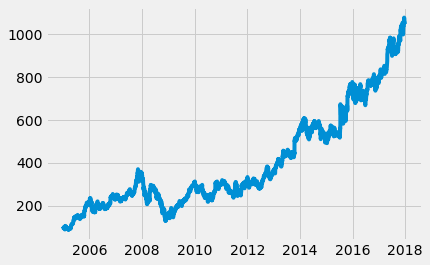

In [10]:
plt.plot(dff["Adj Close"], label = "Adj Close")

In [11]:
data = dff
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3272, freq=None)

In [12]:
data = data['Adj Close'].resample('MS').mean()
data = data.fillna(data.bfill())

In [13]:
data

Date
2005-01-01      96.062933
2005-02-01      97.142726
2005-03-01      90.240846
2005-04-01      99.235423
2005-05-01     119.407432
                 ...     
2017-08-01     922.023045
2017-09-01     931.299503
2017-10-01     982.522275
2017-11-01    1030.492844
2017-12-01    1043.653003
Freq: MS, Name: Adj Close, Length: 156, dtype: float64

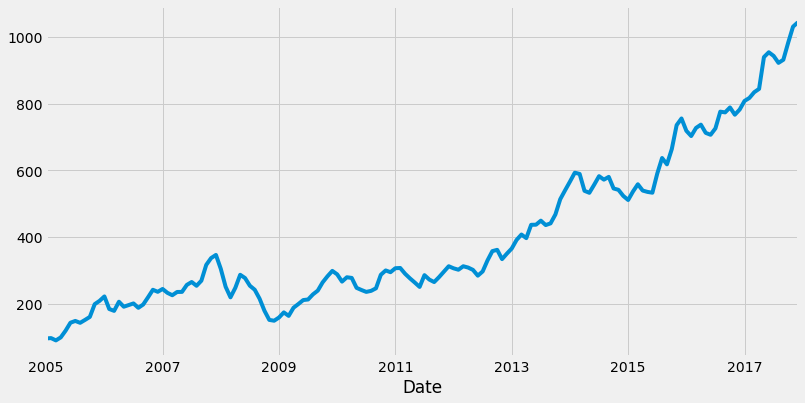

In [14]:
data.plot(figsize=(12, 6))
plt.show()

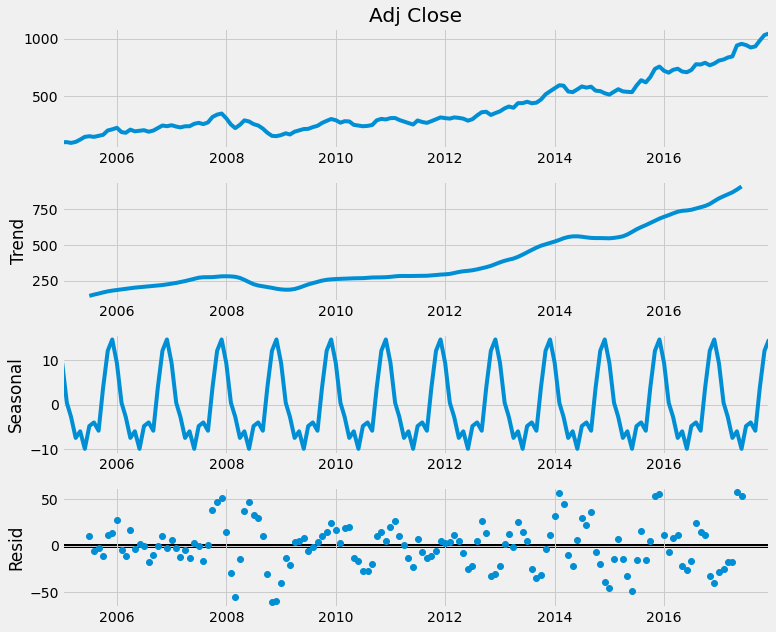

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2359.4285687244683
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2365.133052991853
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1755.2567715094458
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1751.9337839547325
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1945.6597858561395
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1942.5652346654174
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1747.7433168980206
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1721.101203302896
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:2155.077145788969
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2162.9779122691284
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1592.8888867282344
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1591.115080298223
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1762.1133819727286
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1759.921013179026
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1588.4039467900852
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1572.078146004089
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1423.6115383541821
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1425.5675713903872
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC

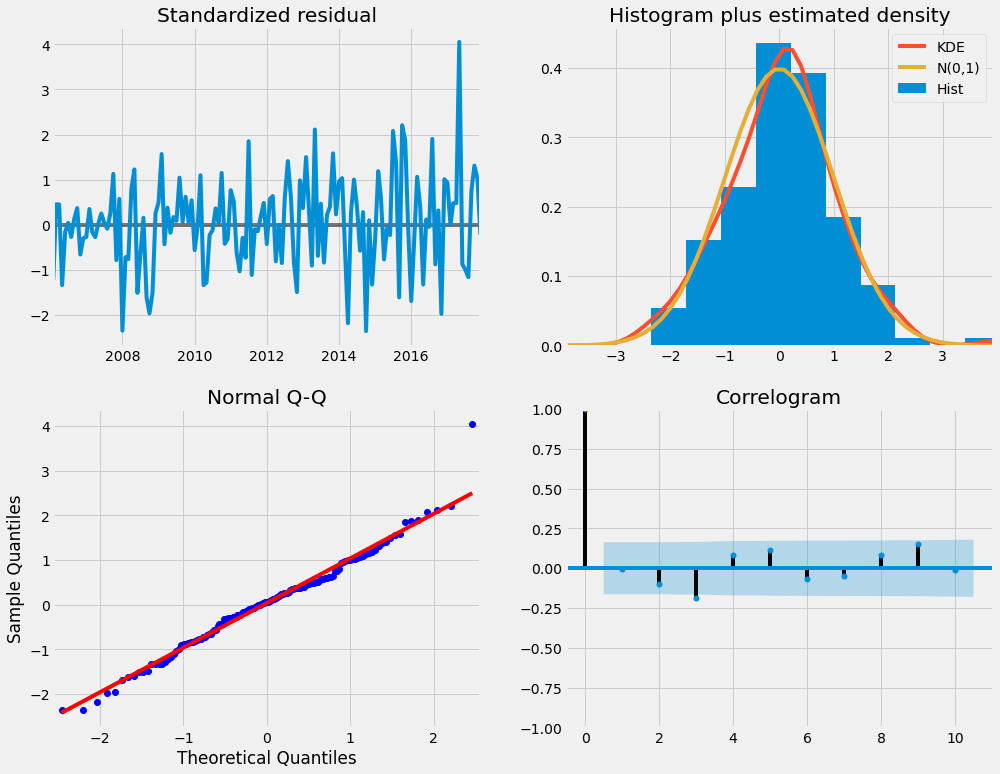

In [17]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)  

        except:
            continue


m = np.amin(AIC_list['AIC'].values) # Find minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find index number for lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]



mod = sm.tsa.statespace.SARIMAX(data,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [18]:
#parameters that provide lowest AIC score is adopted

mod = sm.tsa.statespace.SARIMAX(data,
                                order=(0,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3457      0.078      4.425      0.000       0.193       0.499
ar.S.L12      -0.1398      0.138     -1.015      0.310      -0.410       0.130
ma.S.L12      -0.7560      0.109     -6.965      0.000      -0.969      -0.543
sigma2       528.6752     58.299      9.068      0.000     414.411     642.939


In [19]:
pred = results.get_prediction(start=pd.to_datetime('2017-06-01'),dynamic=False)
pred_ci = pred.conf_int()

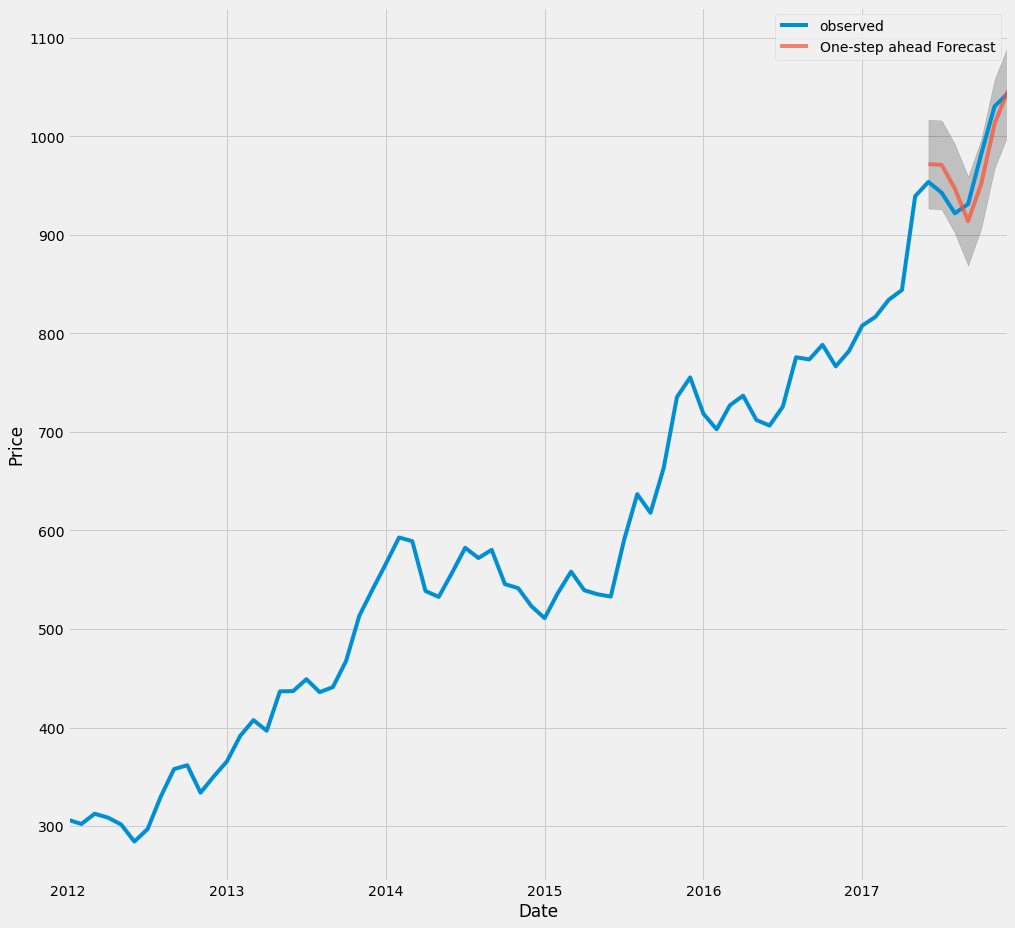

In [20]:
plt.figure(figsize =(15,15))
ax = data['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [24]:
data_forecasted = pred.predicted_mean
data_truth = data['2005-01-04':]

# Compute the mean square error
mse = ((data_forecasted - data_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 471.1


In [25]:

# Get forecast 10 steps ahead in future
pred_uc = results.get_forecast(steps=90)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int(alpha = 0.05)
print(pred_ci)

            lower Adj Close  upper Adj Close
2018-01-01       994.401124      1084.557386
2018-02-01       968.334548      1119.475266
2018-03-01       957.568484      1151.369623
2018-04-01       934.165711      1162.801331
2018-05-01       925.000439      1183.823952
...                     ...              ...
2025-02-01       926.343193      2757.598570
2025-03-01       926.199439      2780.497260
2025-04-01       910.788246      2787.845668
2025-05-01       916.427020      2815.971366
2025-06-01       908.653991      2830.422155

[90 rows x 2 columns]


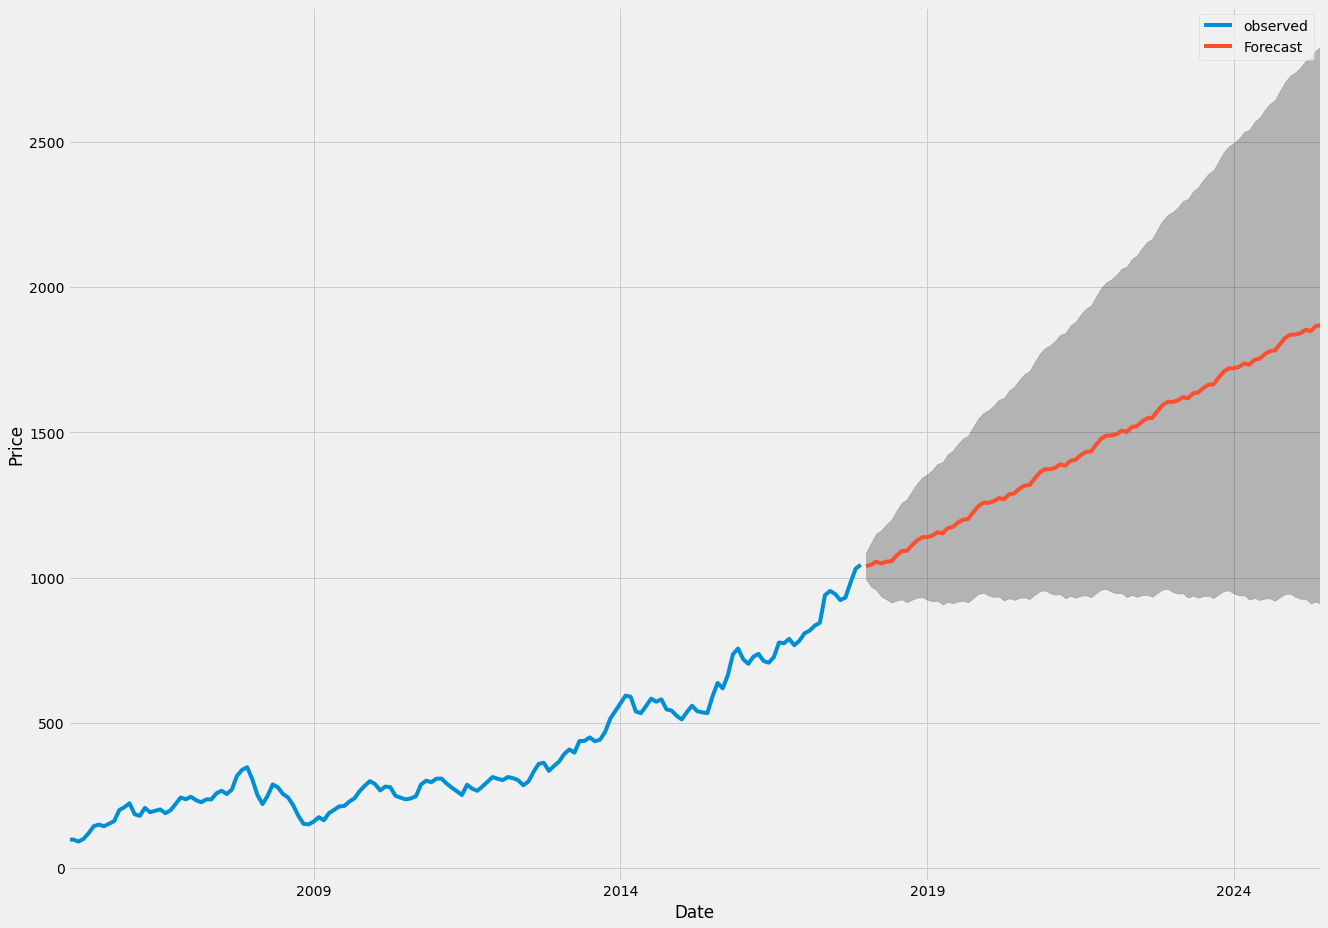

In [26]:
#Plot forecast
ax = data.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()